
| <h1> Activity 4.1 </h1> | <h1> Advanced Data Analytics and Machine Learning  </h1> |
|--- | --- |
Name: Luigi T. Francisco<br>
Course and Section: CPE32S3 <br>
Date Submitted: 02/23/2024 <br>
Instructor: Engr. Roman Richard
Date Performed: 02/23/2024
Date Submitted 02/23/2024


In [85]:
#PART 1
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
titanicTrain = pd.read_csv("titanic_train.csv")
titanicTest = pd.read_csv("titanic_test.csv")
titanicAll = pd.read_csv("titanic_all.csv")


<Axes: >

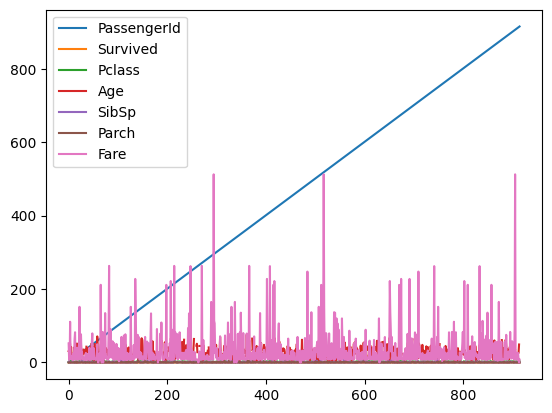

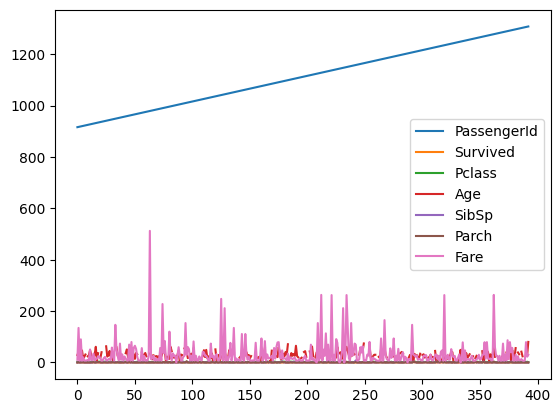

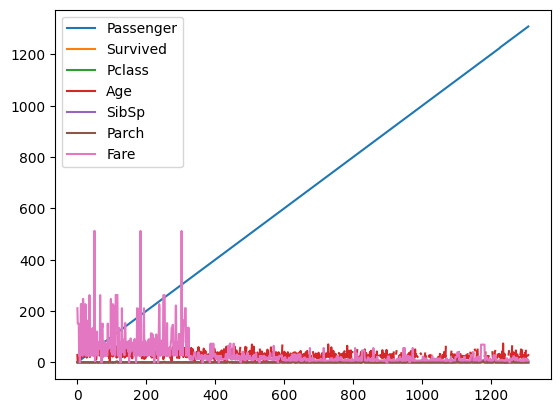

In [86]:
import matplotlib.pyplot as plt
titanicTrain.plot()
titanicTest.plot()
titanicAll.plot()




In [87]:
titanicTrain.info()
titanicTest.info()
titanicAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived

In [88]:
#Lets apply the simple regression model but lets drop all the na entries for age
titanicTrain.dropna(subset=['Age'], inplace=True)
titanicTest.dropna(subset=['Age'], inplace=True)
titanicAll.dropna(subset=['Age'], inplace=True)




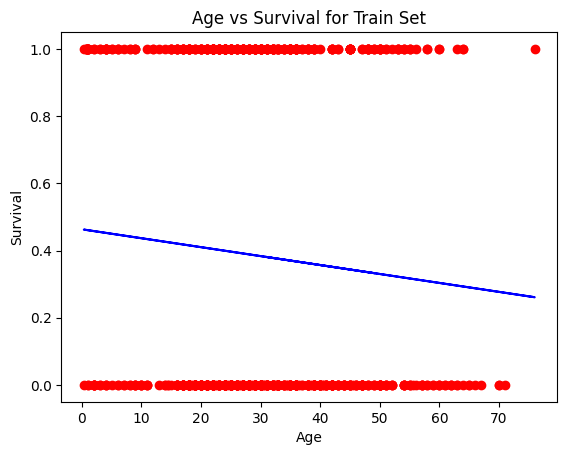

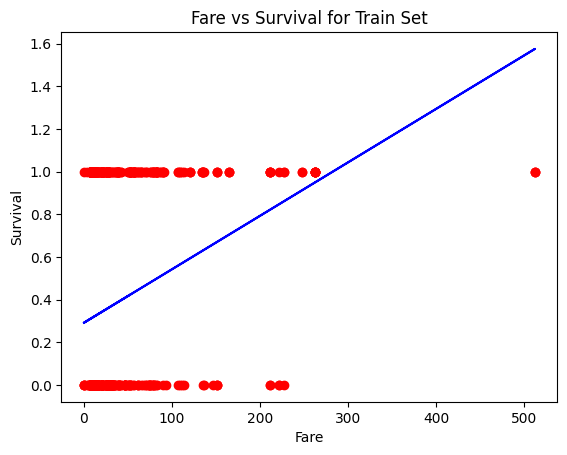

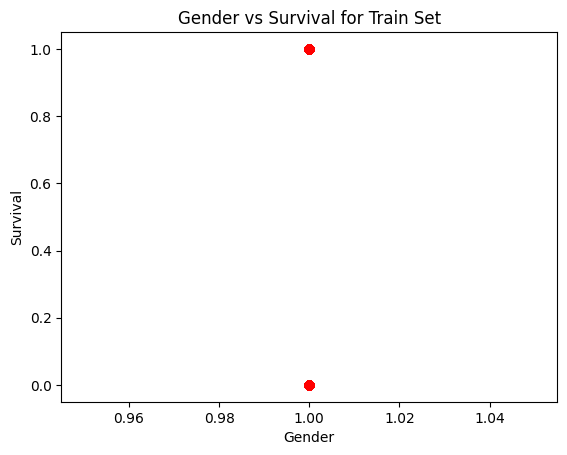

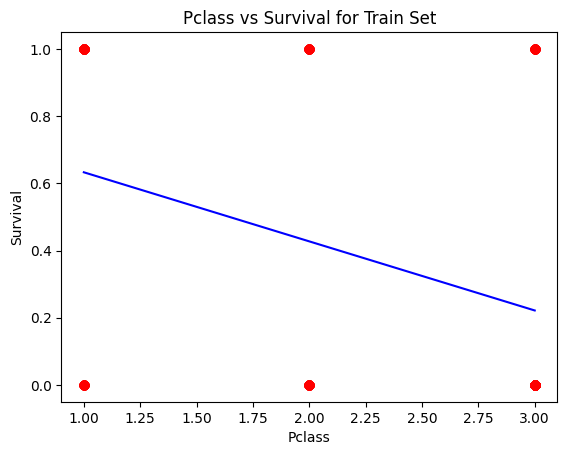

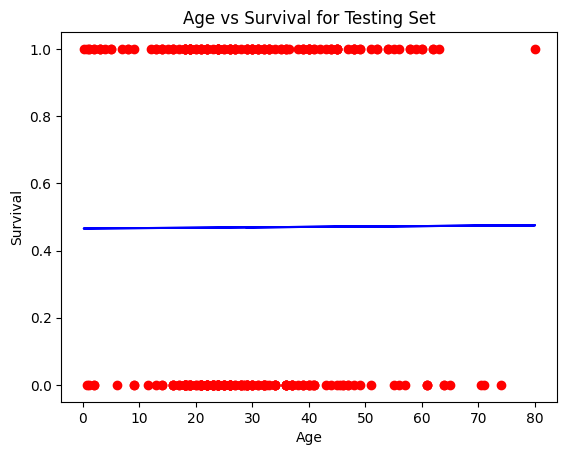

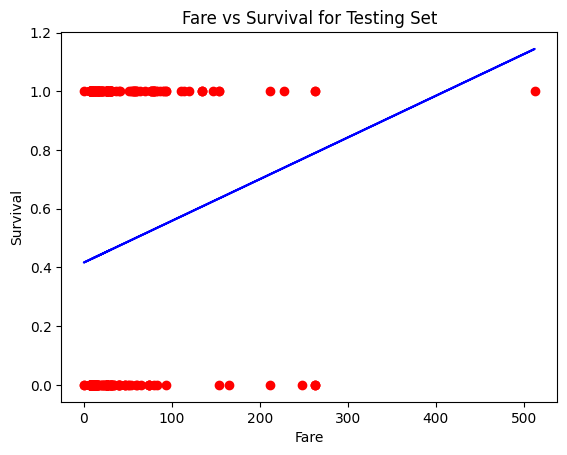

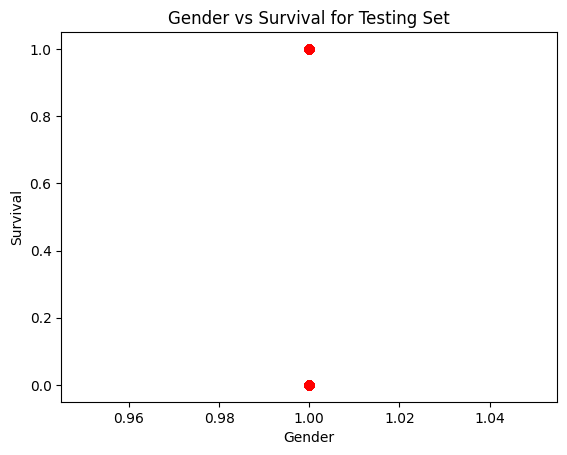

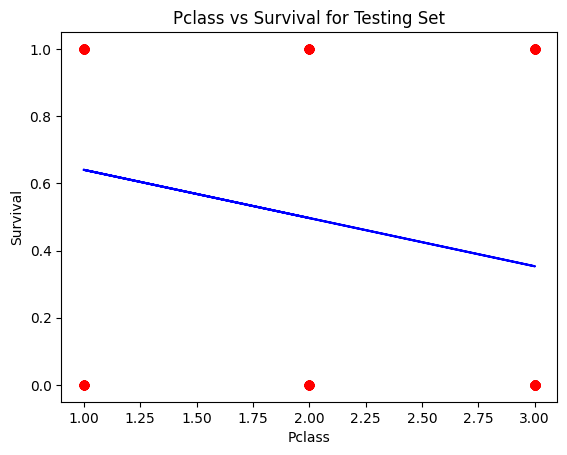

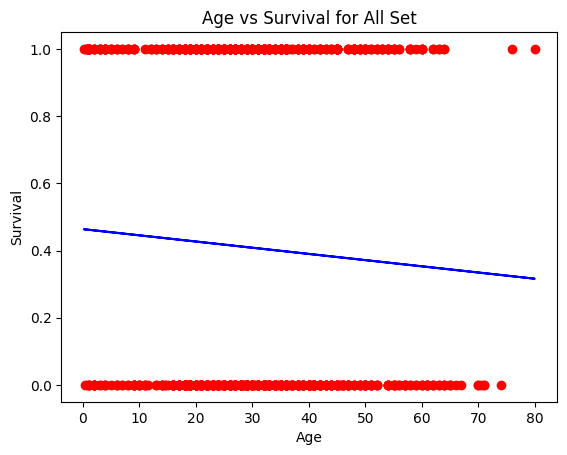

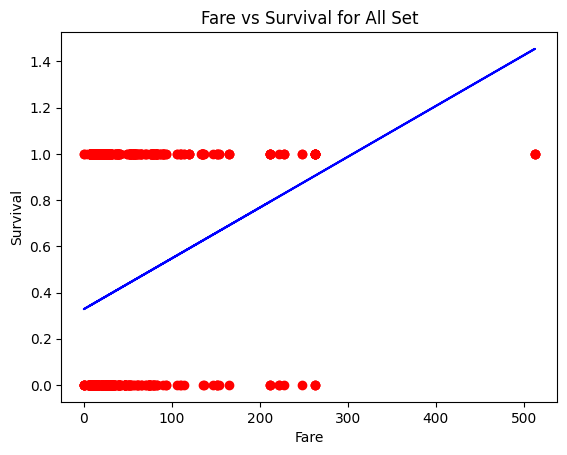

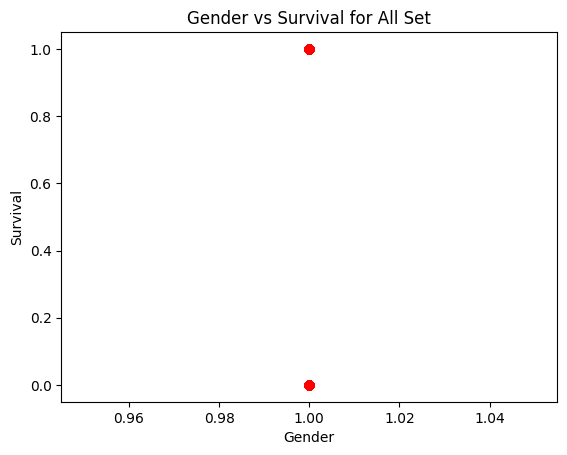

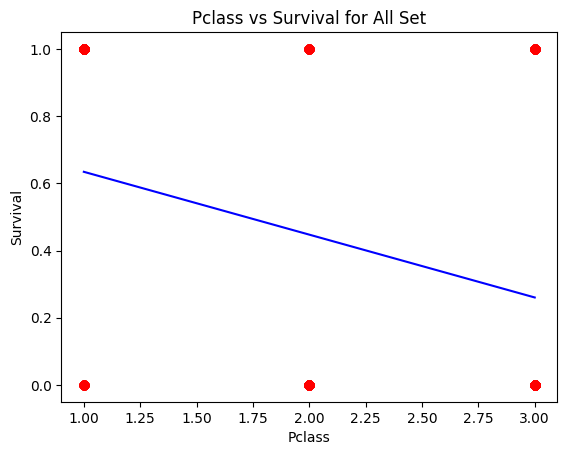

In [138]:
#lets now perform some test
length1 = len(titanicTrain.index)
length2 = len(titanicTest.index)
length3 = len(titanicAll.index)

titanicTrain["Gender"] = titanicTrain["Gender"].apply(lambda toLabel:0 if toLabel == 'male' else 1)
titanicTest["Gender"] = titanicTest["Gender"].apply(lambda toLabel:0 if toLabel == 'male' else 1)
titanicAll["Gender"] = titanicAll["Gender"].apply(lambda toLabel:0 if toLabel == 'male' else 1)

x_collect=[titanicTrain.Age.values,titanicTrain.Fare.values,titanicTrain.Gender.values,titanicTrain.Pclass.values]
x_collect1=[titanicTest.Age.values,titanicTest.Fare.values,titanicTest.Gender.values,titanicTest.Pclass.values]
x_collect2=[titanicAll.Age.values,titanicAll.Fare.values,titanicAll.Gender.values,titanicAll.Pclass.values]
y_targets=[titanicTrain.Survived.values,titanicTest.Survived.values,titanicAll.Survived.values]

x_description=["Age","Fare","Gender","Pclass"]



#x_inReg= titanicTrain.Age.values
#x_inReg1= x_inReg.reshape(length1, -1)

def doRegression(x_collector:list,y_outReg,x_description:list,dataLabel:str,lengthSaid):
  count = 0
  for x_input in x_collector:
    x_inReg1= x_collector[count].reshape(lengthSaid, -1)
    y_outReger = y_outReg.reshape(lengthSaid, -1)
    regressor = LinearRegression()
    regressor.fit(x_inReg1, y_outReger)
    y_pred = regressor.predict(x_inReg1)
    plt.scatter(x_inReg1 ,y_outReger, color = 'red')
    plt.plot(x_inReg1, regressor.predict(x_inReg1), color = 'blue')
    plt.title(x_description[count]+' vs Survival for '+dataLabel)
    plt.xlabel(x_description[count])
    plt.ylabel('Survival')
    plt.show()
    count+=1
doRegression(x_collect,y_targets[0],x_description,"Train Set",length1)
doRegression(x_collect1,y_targets[1],x_description,"Testing Set",length2)
doRegression(x_collect2,y_targets[2],x_description,"All Set",length3)






In [137]:
titanicAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1307
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Passenger  1045 non-null   int64  
 1   Survived   1045 non-null   int64  
 2   Pclass     1045 non-null   int64  
 3   Name       1045 non-null   object 
 4   Gender     1045 non-null   int64  
 5   Age        1045 non-null   float64
 6   SibSp      1045 non-null   int64  
 7   Parch      1045 non-null   int64  
 8   Ticket     1045 non-null   object 
 9   Fare       1045 non-null   float64
 10  Cabin      272 non-null    object 
 11  Embarked   1043 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 106.1+ KB


Conclusion for part 1

In plotting the data, It seems if i plotted every variable against each other all at once its hard to read.

Meanwhile, A simple regression is fascinating to do with numerous variable the thing though is that it doesn't seem to able to represent things very well if the values are only 1,0 which i gave to female and male against survival thats also 0 and 1.



**Part 2**
With the data above, what kinds of questions can we ask about the factors that contributed to passengers
surviving or perishing in the Titanic disaster?

**How does gender, age, ticket class, and fare paid affect passenger survival in titanic?**


In [15]:
#Step 1 Create the data frame
# Lets import pandas and the csv file


# create a data frame for the training data set

training = pd.read_csv("titanic_train.csv")

In [16]:
# Lets verify our work data frame !
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


Are there any missing values in the data set?

**Yes, In the Column of Age and Cabin**

In [102]:
# Lets check out the first 5 rows
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


In [18]:
# STEP 2 Lets prepare the data for the decision Tree Model!!!

#scikit-learn(idk maybe science kit learn?) it states it can only process
#numeric data, thus maybe we have to convert things to numbers?

# this code seems to change the gender values with lambda
# Lambda seems to mean "if it is such thing then change it to this"
#Notably Gender = Sex in this scenario
training["Gender"] = training["Gender"].apply(lambda toLabel:0 if toLabel == 'male' else 1)



In [19]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


Yep, it changed

In [20]:
# Adress Missing Values of Age in the Data Set

training["Age"].fillna(training["Age"].mean(), inplace=True)

In [21]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


Verified that age have 891 entries thus those values were correctly replaced.

In [22]:
training["Age"].mean()

29.970867208672082

What is the value that was used to replace the missing ages?

**29.699 replaced the missing ages**

In [23]:
training.head(50) # for verification

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.000000,0,0,211535,13.0000,NaN,S
6,7,0,3,"Bowen, Mr. David John ""Dai""",0,21.000000,0,0,54636,16.1000,NaN,S
7,8,0,3,"Assam, Mr. Ali",0,23.000000,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
8,9,0,3,"Thomas, Mr. John",0,29.970867,0,0,2681,6.4375,NaN,C
9,10,0,3,"Moran, Mr. Daniel J",0,29.970867,1,0,371110,24.1500,NaN,Q


In [24]:
#STEP 3 Lets Train and Score the Decision Tree Model

# creating our arrays this one is for the target variable!
y_target = training["Survived"].values


In [25]:
# Create an array for the factors? Im not sure about the SibSp though.

columns=["Fare","Pclass","Gender","Age","SibSp"]
# the x variable for our y
x_input = training[list(columns)].values

In [26]:
# Now we create the learned model
from sklearn import tree

# first we create the classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

#what is fit method  anyway ? well it said use fit() method of the decision tree object
# so this fit variable gets input and output

clf_train = clf_train.fit(x_input, y_target)

In [27]:
# EVALUATE THE MODEL ? How do it do that? we use score method of the object
clf_train.score(x_input,y_target)

0.8163934426229508

So this means the model is somehow 82% correct of the time well that's what it said on the paper.

In [28]:
# Step 6 Visualize the Tree
from six import StringIO
with open ("titanic.dot",'w') as f:
    f = tree.export_graphviz(clf_train,out_file=f,feature_names=columns)

Now we install graphiz so how do i do thaT?

In [29]:
!pip install graphviz

In [30]:
# so i somehow installed it

!dot -Tpng titanic.dot -o titanic.png

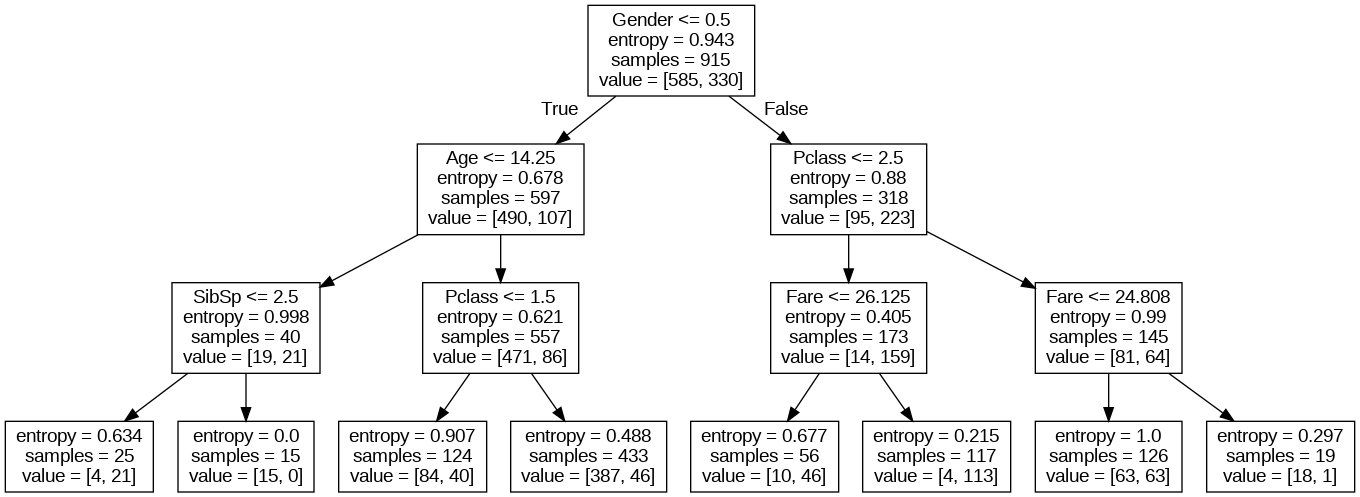

In [31]:
#image module import
from IPython.display import Image

Image("titanic.png")

**The group that had the most death was those that are men,paid lower fare above the age of 13.5 had the most death at 359 people.**

**The group that had the most survivors are women, Passenger class that are lower than 3 paying a fare greater than 28.856 with survivors of 98 people.**

In [32]:
# Lets apply the decision tree model

testing = pd.read_csv("titanic_test.csv")

In [33]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


How many records are in the data set?
**418 records**
Which important variables(s) are missing values and how many are missing?
**The important Variables that have missing values are Age and Fare which have missing values of 86 and 1 respectively.**

In [34]:
#replace the sex to either 0 or 1
testing["Gender"] = testing["Gender"].apply(lambda toLabel:0 if toLabel == 'male' else 1)
#verify
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


In [35]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)
testing.info()
testing["Age"].mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    int64  
 5   Age          393 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 37.0+ KB


29.565689576547232

In [36]:
testing.head(30)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.00000,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.00000,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.00000,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.00000,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
5,921,0,3,"Abbott, Mr. Rossmore Edward",0,16.00000,1,1,C.A. 2673,20.2500,NaN,S
6,922,0,3,"Karlsson, Mr. Nils August",0,22.00000,0,0,350060,7.5208,NaN,S
7,923,0,3,"Connaghton, Mr. Michael",0,31.00000,0,0,335097,7.7500,NaN,Q
8,924,0,3,"Foley, Mr. William",0,29.56569,0,0,365235,7.7500,NaN,Q
9,925,0,2,"Leyson, Mr. Robert William Norman",0,24.00000,0,0,C.A. 29566,10.5000,NaN,S


Values replaced properly

In [37]:
#Label the testing data set
x_input = testing[list(columns)].values

In [38]:
#testing["Cabin"].fillna(testing["Cabin"].mean(), inplace=True)
target_labels = clf_train.predict(x_input)
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

In [39]:
import numpy as np
all_data = pd.read_csv("titanic_all.csv")
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

In [40]:
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) /float(len(testing_results))

In [41]:
print(acc)

0.7588832487309645


In [42]:
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])

In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


So the model is 76.8% accurate

How many records are in the data set?
**1308 records**
Which important variables(s) are missing values and how many are missing?
**Age and its missing 263 values**

In [44]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel:0 if toLabel == 'male' else 1)
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [46]:
 #code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split
#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values
#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [49]:
# Now Lets train the model to fit in the testing data

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_Train = clf_train.fit(X_train,y_train)

In [52]:
#Compare the models by scoring each

train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

print('Training score = '+ train_score +' Testing score ='+ test_score)

Training score = 0.8201530612244898 Testing score =0.8053435114503816


Part 4 For Further Study

In [53]:
trainAgeDropped = pd.read_csv("titanic_train.csv")
trainAgeDropped.dropna(subset=['Age'], inplace=True)


In [55]:
trainAgeDropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 913
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  738 non-null    int64  
 1   Survived     738 non-null    int64  
 2   Pclass       738 non-null    int64  
 3   Name         738 non-null    object 
 4   Gender       738 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        738 non-null    int64  
 7   Parch        738 non-null    int64  
 8   Ticket       738 non-null    object 
 9   Fare         738 non-null    float64
 10  Cabin        187 non-null    object 
 11  Embarked     737 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 75.0+ KB


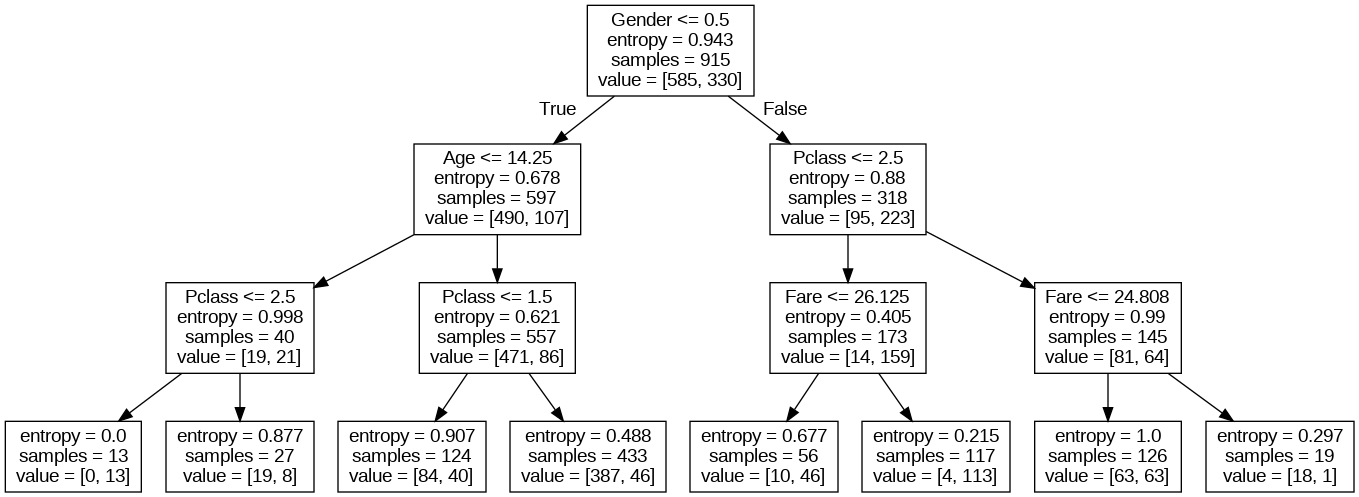

In [57]:
y_target1 = training["Survived"].values

columns=["Fare","Pclass","Gender","Age"] # REMOVED SPOUSE SIBLINGS INPUT
# the x variable for our y
x_input1 = training[list(columns)].values
clf_train1 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)



clf_train1 = clf_train.fit(x_input1, y_target1)

clf_train1.score(x_input1,y_target1)
with open ("titanic2.dot",'w') as f:
    f = tree.export_graphviz(clf_train1,out_file=f,feature_names=columns)
!dot -Tpng titanic2.dot -o titanic2.png
Image("titanic2.png")

**Conclusion for This Actity**

I've learned how to plot data, manipulate data frames, perform simple linear regression, clean data, train a decisiontree classifier, train such model, and apply it, score those models, and etc.

In short, I learned a lot, and this activity allowed me to be creative in how i approach on cleaning data set, selecting variables, and perform data analysis.